In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# Change the working directory
path_to_folder = "ENPM673/tutorials/assets"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials/assets


In [3]:
import cv2
import numpy as np
import math
import glob
import pickle
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np


In [9]:
# this block of code filters out images for which corners can be detected
chessboardSize = (9 , 6)
frameSize = (1920, 1080)

# Using two termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# defining the objpoints which contain the dimension of the chess board
objpoints = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objpoints[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

size_of_chessboard_mm = 20
objpoints = objpoints * size_of_chessboard_mm


# For storing object points and image points
objp = []
imgpoints = []

index = 0
images = glob.glob('Images_P3/*.jpg')

# Go through all the images
for image_path in images:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, chessboardSize, None)
    # If ret is true save that specific image for further processing
    if ret == True:
        index += 1
        objp.append(objpoints)
        imgpoints.append(corners)
        save_path = 'Images_with_corners/image_{}.jpg'.format(index)
        cv2.imwrite(save_path, img)

ret, cameraMatrix, dist, rvecs, tvecs = cv2.calibrateCamera(objp, imgpoints, frameSize, None, None)

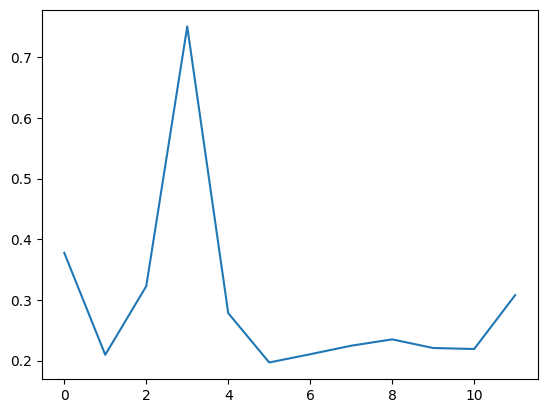

In [10]:
#Drawing the reprojection error
reprojection_errors = []
for i in range(len(objp)):
    imgpoints2, _ = cv2.projectPoints(objp[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    reprojection_errors.append(error)


plt.plot(reprojection_errors)
plt.show()

In [11]:
#This block of code checks which of the undistorted images have their chess boards corners detected and we store their respective
#original image
folder_path = "Images_with_corners"
index = 0
number_list = []
for filename in os.listdir(folder_path):
    #Following code brings in the image from "Images_with_corners"
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        img_original = cv2.imread(image_path)
    #Calculate the corners for the original image
    ret, corners_original = cv2.findChessboardCorners(img_original , chessboardSize, None)

    h,  w = img_original.shape[:2]
    newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))


    # Undistort the original image
    dst = cv2.undistort(img_original, cameraMatrix, dist, None, newCameraMatrix)

    # crop the undistorted image appropriately
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]

    # Convert the undistorted image into grayscale
    gray_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners for undistored images
    ret, corners_dst = cv2.findChessboardCorners(gray_dst , chessboardSize, None)
    print(ret)
    if ret == True :
        #If corners were found save the undistorted image and the original image for further processing
        index = index + 1
        save_path1 = 'U_C_D/image_{}.jpg'.format(index)
        save_path2 = 'Overlapping/image_{}.jpg'.format(index)
        cv2.imwrite(save_path1, dst)
        cv2.imwrite(save_path2, img_original)

False
True
False
True
True
True
False
False
False
True
False
True


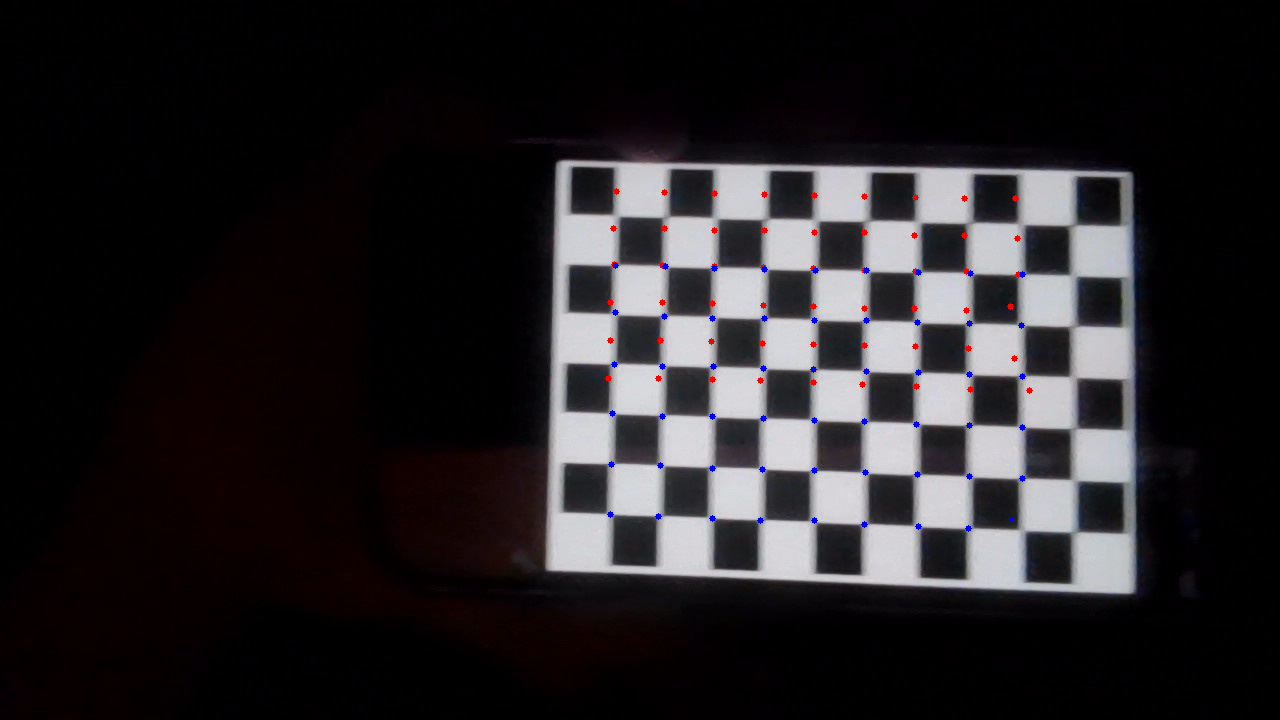

In [13]:
#This block of code plots the original corners and the undistorted corners for visualization purposes as instructed in the problem
folder_path = "Overlapping"
index = 0
for filename in os.listdir(folder_path):
    #Open the image
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        img_original = cv2.imread(image_path)
    ret, corners_original = cv2.findChessboardCorners(img_original , chessboardSize, None)

    h,  w = img_original.shape[:2]
    newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))


    # Undistort the image
    dst = cv2.undistort(img_original, cameraMatrix, dist, None, newCameraMatrix)

    # crop the undistorted image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]

    gray_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners for undistored images
    ret, corners_dst = cv2.findChessboardCorners(gray_dst , chessboardSize, None)
    corners_dst_f = corners_dst.flatten()
    corners_reshaped_dst = corners_dst_f.reshape(-1, corners_dst.shape[-1])
    # some processing for plotting the corners
    coords_dst = []
    for array in corners_reshaped_dst:
        x = array[0]
        y = array[1]
        coords_dst.append((x , y))

    if (type(corners_original) == type(None)):
        continue

    corners_original_f = corners_original.flatten()
    corners_reshaped_original = corners_original_f.reshape(-1, corners_dst.shape[-1])

    coords_original = []
    for array in corners_reshaped_original:
        x = array[0]
        y = array[1]
        coords_original.append((x , y))



    #These lines plot the points
    for tup in coords_dst:
        x , y = tup
        cv2.circle(img_original, (int(round(x)), int(round(y))), 3, (0, 0, 255), -1)

    for tup in coords_original:
        x , y = tup
        cv2.circle(img_original, (int(round(x)), int(round(y))), 3, (255, 0, 0), -1)

    #Save the images after plotting
    save_path = 'Images_after_p/output_image_{}.jpg'.format(index)

    #Showing the images on the
    cv2.imwrite(save_path , img_original)
    index = index + 1
    cv2_imshow(img_original)
    clear_output(True)



In [45]:
#This block of code and the ones that follow this deal with the second problem.
#Following deals with finding matches in images
import cv2
from google.colab.patches import cv2_imshow

#List for storing good matches
good_matches = []

def matcher(threshold , image1, image2, trees, checks):
      # Using SIFT detector for matching
      sift = cv2.SIFT_create()

      # FLANN parameters
      FLANN_INDEX_KDTREE = 1
      index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=trees)
      search_params = dict(checks=checks)

      # Matcher
      flann = cv2.FlannBasedMatcher(index_params, search_params)


      # Detect keypoints and compute descriptors
      keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
      keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

      #calculate matches
      matches = flann.knnMatch(descriptors1, descriptors2, k=2)
      pts1 = []
      pts2 = []
      #utilize threshod to identify good matches
      for m, n in matches:
          if m.distance < threshold * n.distance:
              good_matches.append(m)
              pts2.append(keypoints2[m.trainIdx].pt)
              pts1.append(keypoints1[m.queryIdx].pt)

      return keypoints1, keypoints2, pts1, pts2

image1 = cv2.imread('im0.png')
image2 = cv2.imread('im1.png')
image3 = cv2.imread('im2.png')
image4 = cv2.imread('im3.png')
image5 = cv2.imread('im4.png')
image6 = cv2.imread('im5.png')




#keypoints , descriptors , and points for each pair of images are received here.
keypoints1, keypoints2, pts1, pts2 = matcher(0.5, image1 , image2, 20 , 100)

keypoints3, keypoints4, pts3, pts4 = matcher(0.4, image3, image4, 5 , 30)

keypoints5, keypoint6, pts5, pts6 = matcher(0.7, image5, image6, 5 , 50)

#Calculation of fundamebtal matrix
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F1, mask1 = cv2.findFundamentalMat( pts1, pts2, cv2.FM_RANSAC, ransacReprojThreshold=1.0)

pts3 = np.int32(pts3)
pts4 = np.int32(pts4)
F2, mask2 = cv2.findFundamentalMat(pts3, pts4, cv2.FM_RANSAC, ransacReprojThreshold=1.0)

pts5 = np.int32(pts5)
pts6 = np.int32(pts6)
F3, mask3 = cv2.findFundamentalMat(pts5, pts6, cv2.FM_RANSAC, ransacReprojThreshold=1.0)
# pts1 = pts1[mask.ravel()==1]
# pts2 = pts2[mask.ravel()==1]
#cv2_imshow(matched_image_0_1)

print(F1)
print(F2)
print(F3)

[[-1.85097464e-22 -2.52284141e-17  2.05325508e-14]
 [ 2.30912788e-17  3.10371428e-18  3.33333333e-01]
 [-1.99492835e-14 -3.33333333e-01  1.00000000e+00]]
[[ 2.69874727e-09  1.68850431e-05 -1.77065418e-02]
 [-1.67990647e-05 -3.46197373e-07 -9.62628062e-02]
 [ 1.76409819e-02  9.57235817e-02  1.00000000e+00]]
[[ 6.07132451e-08 -3.53369939e-04  2.33606035e-01]
 [ 3.54983124e-04 -2.11102055e-05  4.98016750e+00]
 [-2.34229417e-01 -4.97649345e+00  1.00000000e+00]]


In [46]:
#Computation of essential matrix
import math
def compute_essential_matrix(F, K1, K2):
    # Compute Essential matrix using the relation: E = K2^T * F * K1
    E = np.dot(np.dot(K2.T, F), K1)
    return E


#Defining the required matrices for each pair of cameras
K1 = np.array([[1746.24 , 0 , 14.88] ,  [0 , 1746.24 , 534.11], [0 ,  0 , 1]])
K2 = np.array([[1746.24 ,  0  , 14.88], [0 , 1746.24  , 534.11], [0 , 0 , 1]])
K3 = np.array([[1742.11 , 0 , 804.90] , [0 , 1742.11 , 541.22] ,  [0 ,  0 ,  1]])
K4 = np.array([[1742.11 , 0 , 804.90] , [0 , 1742.11 , 541.22] ,  [0 ,  0 ,  1]])
K5 = np.array([[1769.02 , 0 , 1271.89], [0 , 1769.02 , 527.17] , [0 , 0 , 1]])
K6 = np.array([[1769.02 , 0 , 1271.89], [0 , 1769.02 , 527.17] , [0 , 0 , 1]])

#Computing essential matrices
E1 = compute_essential_matrix(F1 , K1 , K2)  * 678.37
E2 = compute_essential_matrix(F2 , K3 , K4)  * 221.76
E3 = compute_essential_matrix(F3 , K5 , K6)  * 295.44
print(E1)
print(E2)
print(E3)


# depth_map1  = compute_depth_map(disparity_map1, 678.37, 1746.24)
# depth_map2  = compute_depth_map(disparity_map2, 221.76, 1742.11)
# depth_map3  = compute_depth_map(disparity_map3, 295.44, 1769.02)

[[-3.82890831e-13 -5.21872545e-08  8.36064726e-09]
 [ 4.77663969e-08  6.42031345e-09  3.94865610e+05]
 [-9.02189339e-09 -3.94865610e+05  6.78370000e+02]]
[[ 1.81633761e+00  1.13641389e+04 -3.30924621e+03]
 [-1.13062729e+04 -2.33001184e+02 -4.24854177e+04]
 [ 3.30357400e+03  4.21590619e+04  1.31545126e+02]]
[[ 5.61329965e+01 -3.26711471e+05  2.47716509e+04]
 [ 3.28202955e+05 -1.95176372e+04  2.83298618e+06]
 [-2.45722735e+04 -2.84162619e+06 -7.51263748e+02]]


In [47]:
#Computing rotation and translation matrices
def recover_rotation_translation(E, src_pts, dst_pts, K1, K2):
   #Utilizing the inbuilt cv2 function here
    _, R , t , _ = cv2.recoverPose(E, src_pts, dst_pts)



    return R, t


R1 , t1 = recover_rotation_translation(E1 , pts1 , pts2 , K1 , K2)

R2 , t2 = recover_rotation_translation(E2 , pts3 , pts4 , K3 , K4)

R3 , t3 = recover_rotation_translation(E3 , pts5 , pts6 , K5 , K6)

print(R1)
print(t1)

print(R2)
print(t2)

print(R3)
print(t3)

[[ 1.00000000e+00 -1.99596771e-15  1.11778121e-14]
 [ 2.00556858e-15  9.99999631e-01 -8.58988138e-04]
 [-1.11760935e-14  8.58988138e-04  9.99999631e-01]]
[[ 1.00000000e+00]
 [-2.09463437e-14]
 [-1.32164598e-13]]
[[ 0.99999142  0.00140481  0.00389676]
 [-0.0014005   0.9999984  -0.0011087 ]
 [-0.00389832  0.00110324  0.99999179]]
[[-0.96265519]
 [ 0.07578724]
 [ 0.2599063 ]]
[[ 9.99999515e-01 -2.48188177e-04 -9.53446298e-04]
 [ 2.51563146e-04  9.99993698e-01  3.54127071e-03]
 [ 9.52561388e-04 -3.54150885e-03  9.99993275e-01]]
[[-0.99342442]
 [ 0.00871678]
 [ 0.11415753]]


In [48]:
#rectifying the images
import matplotlib.pyplot as plt
def rectify_images(image1, image2, src_pts, dst_pts, K1, K2, R, t, F):
    # Compute rectification transformation
    _, H1, H2 = cv2.stereoRectifyUncalibrated(src_pts, dst_pts, F, list(image1.shape[:2]))

    # utilize warp perspective for rectification
    rectified_img1 = cv2.warpPerspective(image1, H1, (image1.shape[1], image1.shape[0]))
    rectified_img2 = cv2.warpPerspective(image2, H2, (image2.shape[1], image2.shape[0]))

    return rectified_img1, rectified_img2, H1, H2

# Rectify the images
rectified_img1, rectified_img2, H1, H2 = rectify_images(image1, image2, pts1, pts2, K1, K2, R1, t1, F1)
rectified_img3, rectified_img4, H3, H4 = rectify_images(image3, image4, pts3, pts4, K3, K4, R2, t2, F2)
rectified_img5, rectified_img6, H5, H6 = rectify_images(image5, image6, pts5, pts6, K5, K6, R3, t3, F3)

print(H1)
print(H2)
print(H3)
print(H4)
print(H5)
print(H6)

[[-3.31017809e-01  4.39572825e-02  1.65651349e+01]
 [ 5.27085492e-14 -3.33333333e-01  1.00000000e+00]
 [ 5.25939636e-17  8.95630303e-17 -3.33333333e-01]]
[[ 1.00000000e+00  1.12872360e-14 -1.09139364e-11]
 [-1.12872360e-14  1.00000000e+00  6.13908924e-12]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.05680253e-01 -5.20445354e-04  3.88154501e-01]
 [ 1.63750008e-02  9.71021657e-02 -7.72869114e+00]
 [ 1.55920723e-05  9.53755635e-08  8.95835891e-02]]
[[ 1.08714895e+00 -1.56738962e-02 -3.20134920e+01]
 [ 1.69532136e-01  9.97659708e-01 -8.93006730e+01]
 [ 1.61579377e-04 -2.32955972e-06  9.14983514e-01]]
[[-5.01679391e+00  1.70036806e-02  2.99155216e+02]
 [-2.25703969e-01 -4.98809417e+00  1.27913308e+02]
 [-3.42143030e-04  1.34303436e-05 -4.79547428e+00]]
[[ 1.03660729e+00  2.10504051e-02 -3.99763267e+01]
 [ 4.51432388e-02  1.00112289e+00 -2.54553243e+01]
 [ 6.81729928e-05  1.38439033e-06  9.61857569e-01]]


(-0.5, 1919.5, 1079.5, -0.5)

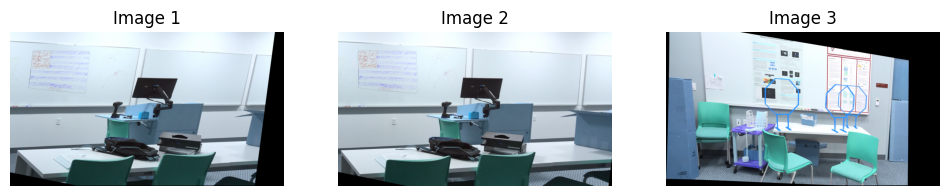

In [49]:
#Displaying the rectified images
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(rectified_img1)
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(rectified_img2)
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(rectified_img3)
ax3.set_title('Image 3')
ax3.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

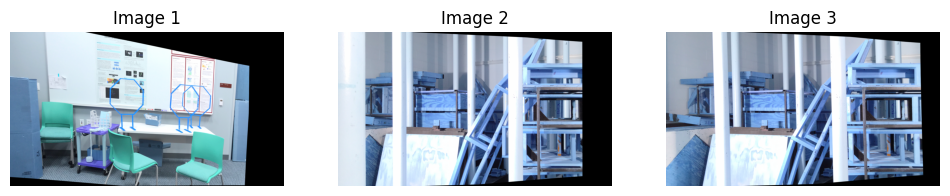

In [50]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(rectified_img4)
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(rectified_img5)
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(rectified_img6)
ax3.set_title('Image 3')
ax3.axis('off')

In [35]:
#Visualizing the epipolar lines
def visualize_epipolar_lines(src_pts, dst_pts, rectified_img1, rectified_img2, F):
    # Drawing epipolar lines of image 1 on image 2 and of image 2 on image 1
    for pt1, pt2 in zip(src_pts, dst_pts):
        pt1 = (round(pt1[0]) , round(pt1[1]))
        pt2 = (round(pt2[0]) , round(pt2[1]))
        cv2.circle(rectified_img1, pt1, 5, (0, 255, 0), -1)
        cv2.circle(rectified_img2, pt2, 5, (0, 255, 0), -1)

    #Bring the lines to the right format
    lines1 = cv2.computeCorrespondEpilines(src_pts, 1, F)
    lines1 = lines1.reshape(-1, 3)
    lines2 = cv2.computeCorrespondEpilines(dst_pts, 2, F)
    lines2 = lines2.reshape(-1, 3)
    #Finally draw the lines
    for line1, line2 in zip(lines1, lines2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -line1[2]/line1[1]])
        x1, y1 = map(int, [rectified_img1.shape[1], -(line1[2]+line1[0]*rectified_img1.shape[1])/line1[1]])
        cv2.line(rectified_img2, (x0, y0), (x1, y1), color, 1)

        x0, y0 = map(int, [0, -line2[2]/line2[1]])
        x1, y1 = map(int, [rectified_img2.shape[1], -(line2[2]+line2[0]*rectified_img2.shape[1])/line2[1]])
        cv2.line(rectified_img1, (x0, y0), (x1, y1), color, 1)

    return rectified_img1, rectified_img2

# Visualize epipolar lines and feature points on rectified images
visualized_img1, visualized_img2 = visualize_epipolar_lines(pts1, pts2, rectified_img1, rectified_img2, F1)
visualized_img3, visualized_img4 = visualize_epipolar_lines(pts3, pts4, rectified_img3, rectified_img4, F2)
visualized_img5, visualized_img6 = visualize_epipolar_lines(pts5, pts6, rectified_img5, rectified_img6, F3)

(-0.5, 1919.5, 1079.5, -0.5)

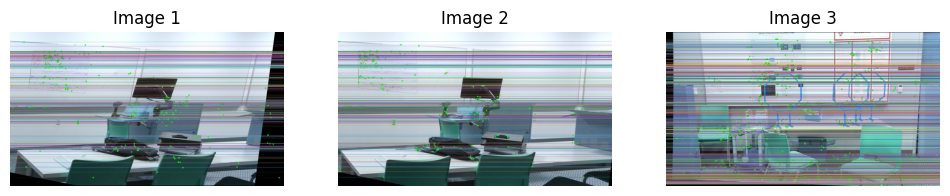

In [36]:

fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(visualized_img1)
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(visualized_img2)
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(visualized_img3)
ax3.set_title('Image 3')
ax3.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

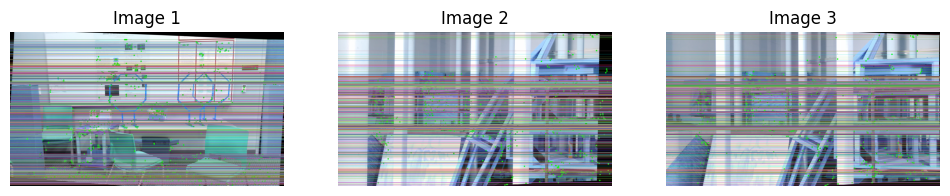

In [37]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(visualized_img4)
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(visualized_img5)
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(visualized_img6)
ax3.set_title('Image 3')
ax3.axis('off')

In [51]:
import cv2
import numpy as np
#Calculating the disparity map
def calculate_disparity_map(rectified_img1, rectified_img2 , number1, number2):
    # Convert to grayscale
    gray1 = cv2.cvtColor(rectified_img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(rectified_img2, cv2.COLOR_BGR2GRAY)

    # Utilizing the StereoBM_create
    stereo = cv2.StereoBM_create(numDisparities= number1, blockSize=7)
    stereo.setMinDisparity(number2)

    # Compute disparity map
    disparity = stereo.compute(gray1, gray2)

    return disparity

# Calculate the disparity map
disparity_map1 = calculate_disparity_map(rectified_img1, rectified_img2, 80, 0)
disparity_map2 = calculate_disparity_map(rectified_img3, rectified_img4, 80, 0)
disparity_map3 = calculate_disparity_map(rectified_img5, rectified_img6, 80, 0)

(-0.5, 1919.5, 1079.5, -0.5)

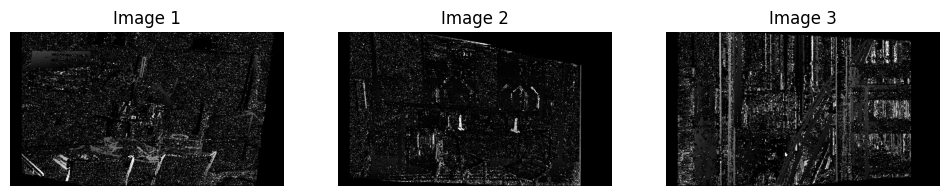

In [52]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(disparity_map1, cmap = 'gray')
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(disparity_map2, cmap = 'gray')
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(disparity_map3, cmap = 'gray' )
ax3.set_title('Image 3')
ax3.axis('off')

In [53]:
#Save this normalized disparity
import matplotlib.pyplot as plt
import numpy as np
import cv2
def normalized_heat_map(disparity_map):
    #normalize the disparity map
    n_disparity = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    heatmap = cv2.applyColorMap(n_disparity, cv2.COLORMAP_HOT)
    return n_disparity , heatmap

n_disparity1 , heatmap1 = normalized_heat_map(disparity_map1)
n_disparity2 , heatmap2 = normalized_heat_map(disparity_map2)
n_disparity3 , heatmap3 = normalized_heat_map(disparity_map3)

#save the normalized disparity map
cv2.imwrite('disparity/disparity1.jpg', n_disparity1)
cv2.imwrite('disparity/disparity2.jpg', n_disparity2)
cv2.imwrite('disparity/disparity3.jpg', n_disparity3)



True

(-0.5, 1919.5, 1079.5, -0.5)

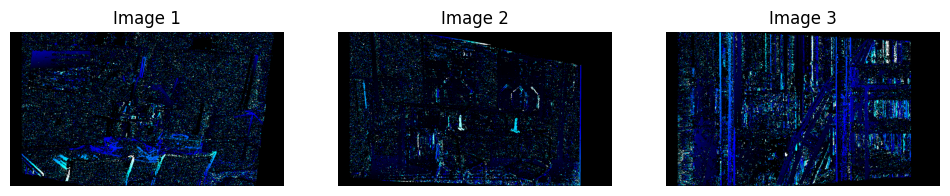

In [54]:
#save the coloured disparity map
cv2.imwrite('colour_maps/heatmap1.jpg', heatmap1)
cv2.imwrite('colour_maps/heatmap2.jpg', heatmap2)
cv2.imwrite('colour_maps/heatmap3.jpg', heatmap3)

#Some standard code to display the cloured depth maps. Please note that the heatmaps are coloured orange but just dispalyed blue
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(heatmap1, cmap ='viridis')
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(heatmap2, cmap = 'viridis')
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(heatmap3, cmap = 'viridis')
ax3.set_title('Image 3')
ax3.axis('off')


In [58]:
#Depth map computation
import cv2
import numpy as np


def compute_depth_map(disparity_map, baseline, focal_length):
    # Compute depth map using the formula Z = (f * T) / disparity
    disparity_map[disparity_map == 0] = 1
    depth_map = (focal_length * baseline) / ( disparity_map)
    return depth_map




# Compute depth map
depth_map1  = compute_depth_map(disparity_map1, 678.37, 1746.24)
depth_map2  = compute_depth_map(disparity_map2, 221.76, 1742.11)
depth_map3  = compute_depth_map(disparity_map3, 295.44, 1769.02)

#normalize each depth map
depth_map_normalized1 = cv2.normalize(depth_map1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
depth_map_normalized2 = cv2.normalize(depth_map2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
depth_map_normalized3 = cv2.normalize(depth_map3, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#colour each depth map
depth_coloured1 = cv2.applyColorMap(depth_map_normalized1, cv2.COLORMAP_HOT)
depth_coloured2 = cv2.applyColorMap(depth_map_normalized2, cv2.COLORMAP_HOT)
depth_coloured3 = cv2.applyColorMap(depth_map_normalized3, cv2.COLORMAP_HOT)

#save the normalized depth map and the coloured depth maps
cv2.imwrite('Coloured_depth_images/depth_coloured1.jpg', depth_coloured1)
cv2.imwrite('Coloured_depth_images/depth_coloured2.jpg', depth_coloured2)
cv2.imwrite('Coloured_depth_images/depth_coloured3.jpg', depth_coloured3)

cv2.imwrite('Depth_images/depth_map_normalized1.jpg', depth_map_normalized1)
cv2.imwrite('Depth_images/depth_map_normalized2.jpg', depth_map_normalized2)
cv2.imwrite('Depth_images/depth_map_normalized3.jpg', depth_map_normalized3)


True

(-0.5, 1919.5, 1079.5, -0.5)

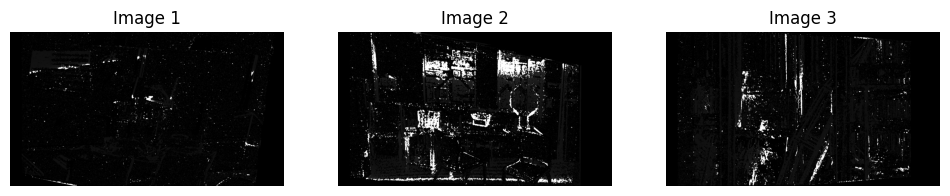

In [56]:
#Following is some standard code to dispaly the normalized depth maps
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(depth_map_normalized1, cmap = 'gray')
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(depth_map_normalized2, cmap = 'gray')
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(depth_map_normalized3, cmap = 'gray' )
ax3.set_title('Image 3')
ax3.axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

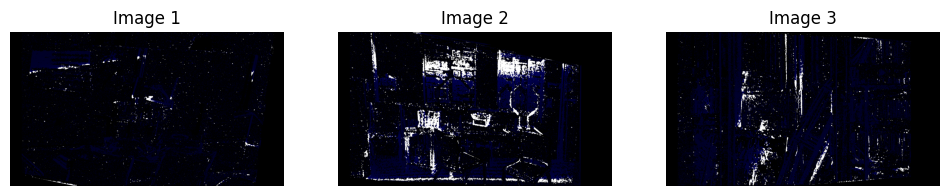

In [57]:
#Some standard code to display the cloured depth maps. Please note the bluish tint in the images which is there. Though when these images are saved they appear reddish
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(depth_coloured1)
ax1.set_title('Image 1')
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(depth_coloured2)
ax2.set_title('Image 2')
ax2.axis('off')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(depth_coloured3)
ax3.set_title('Image 3')
ax3.axis('off')